<a href="https://colab.research.google.com/github/PasupalateSharran/Coding-Raja-Technologies-Internship/blob/master/CostAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df_food = pd.read_csv("/content/food_orders_new_delhi.csv")
df_food.head(10)

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,None,146,27,0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0
5,6,C7265,R2777,2024-01-25 04:36:52,2024-01-25 05:27:52,439,20,Cash on Delivery,10%,92,27,150
6,7,C1466,R2457,2024-01-12 23:55:48,2024-01-13 00:48:48,303,30,Digital Wallet,5% on App,144,12,50
7,8,C5426,R2978,2024-01-26 22:46:24,2024-01-27 00:36:24,260,0,Credit Card,10%,55,19,0
8,9,C6578,R2877,2024-01-02 18:29:59,2024-01-02 20:23:59,1663,40,Cash on Delivery,5% on App,116,48,0
9,10,C9322,R2161,2024-01-05 00:50:19,2024-01-05 02:10:19,491,40,Digital Wallet,10%,189,10,0


In [ ]:
df_food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Order ID                1000 non-null   int64 
 1   Customer ID             1000 non-null   object
 2   Restaurant ID           1000 non-null   object
 3   Order Date and Time     1000 non-null   object
 4   Delivery Date and Time  1000 non-null   object
 5   Order Value             1000 non-null   int64 
 6   Delivery Fee            1000 non-null   int64 
 7   Payment Method          1000 non-null   object
 8   Discounts and Offers    1000 non-null   object
 9   Commission Fee          1000 non-null   int64 
 10  Payment Processing Fee  1000 non-null   int64 
 11  Refunds/Chargebacks     1000 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 93.9+ KB


In [ ]:
from datetime import datetime

In [ ]:
df_food["Order Date and Time"] = pd.to_datetime(df_food["Order Date and Time"])
df_food["Delivery Date and Time"] = pd.to_datetime(df_food["Delivery Date and Time"])

In [ ]:
df_food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Order ID                1000 non-null   int64         
 1   Customer ID             1000 non-null   object        
 2   Restaurant ID           1000 non-null   object        
 3   Order Date and Time     1000 non-null   datetime64[ns]
 4   Delivery Date and Time  1000 non-null   datetime64[ns]
 5   Order Value             1000 non-null   int64         
 6   Delivery Fee            1000 non-null   int64         
 7   Payment Method          1000 non-null   object        
 8   Discounts and Offers    1000 non-null   object        
 9   Commission Fee          1000 non-null   int64         
 10  Payment Processing Fee  1000 non-null   int64         
 11  Refunds/Chargebacks     1000 non-null   int64         
dtypes: datetime64[ns](2), int64(6), object(4)
memory 

In [ ]:
#Extract numerical values from the string of offers

def extract_discount(discount_str):
  if 'off' in discount_str:
    return float(discount_str.split(" ")[0])
  elif '%' in discount_str:
    return float(discount_str.split("%")[0])
  else:
    return 0.0

In [ ]:
df_food["Discount Percentage"] = df_food['Discounts and Offers'].apply(lambda x: extract_discount(x))
df_food.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Discount Percentage
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0,5.0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0,10.0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0,15.0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,None,146,27,0,0.0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0,50.0


In [ ]:
#calculate the discount amount

df_food['Discount Amount'] = df_food.apply(lambda x: (x['Order Value'] * x['Discount Percentage'] / 100)
                                            if x['Discount Percentage'] > 1
                                           else x['Discount Percentage'], axis = 1)

In [ ]:
df_food['Discount Amount'].head()

0     95.70
1     98.60
2    140.55
3      0.00
4    996.00
Name: Discount Amount, dtype: float64

In [ ]:
# adjust 'Discount Amount' for fixed discounts directly specified in the 'Discounts and Offers' column

df_food['Discount Amount'] = df_food.apply(lambda x: x['Discount Amount'] if x['Discount Percentage'] <= 1
                                                   else x['Order Value'] * x['Discount Percentage'] / 100, axis=1)

In [ ]:
df_food[['Order Value', 'Discounts and Offers', 'Discount Percentage', 'Discount Amount']].head()

,Order Value,Discounts and Offers,Discount Percentage,Discount Amount
0,1914,5% on App,5.0,95.70
1,986,10%,10.0,98.60
2,937,15% New User,15.0,140.55
3,1463,None,0.0,0.00
4,1992,50 off Promo,50.0,996.00


In [ ]:
df_food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order ID                1000 non-null   int64  
 1   Customer ID             1000 non-null   object 
 2   Restaurant ID           1000 non-null   object 
 3   Order Date and Time     1000 non-null   object 
 4   Delivery Date and Time  1000 non-null   object 
 5   Order Value             1000 non-null   int64  
 6   Delivery Fee            1000 non-null   int64  
 7   Payment Method          1000 non-null   object 
 8   Discounts and Offers    1000 non-null   object 
 9   Commission Fee          1000 non-null   int64  
 10  Payment Processing Fee  1000 non-null   int64  
 11  Refunds/Chargebacks     1000 non-null   int64  
 12  Discount Percentage     1000 non-null   float64
 13  Discount Amount         1000 non-null   float64
dtypes: float64(2), int64(6), object(6)
memory

In [ ]:
# calculate total costs and revenue per order
df_food['Total Costs'] = df_food['Delivery Fee'] + df_food['Payment Processing Fee'] + df_food['Discount Amount']
df_food['Revenue'] = df_food['Commission Fee']
df_food['Profit'] = df_food['Revenue'] - df_food['Total Costs']

# aggregate data to get overall metrics
total_orders = df_food.shape[0]
total_revenue = df_food['Revenue'].sum()
total_costs = df_food['Total Costs'].sum()
total_profit = df_food['Profit'].sum()

overall_metrics = {
    "Total Orders": total_orders,
    "Total Revenue": total_revenue,
    "Total Costs": total_costs,
    "Total Profit": total_profit
}

overall_metrics

{'Total Orders': 1000,
 'Total Revenue': 126990,
 'Total Costs': 232709.85,
 'Total Profit': -105719.85}

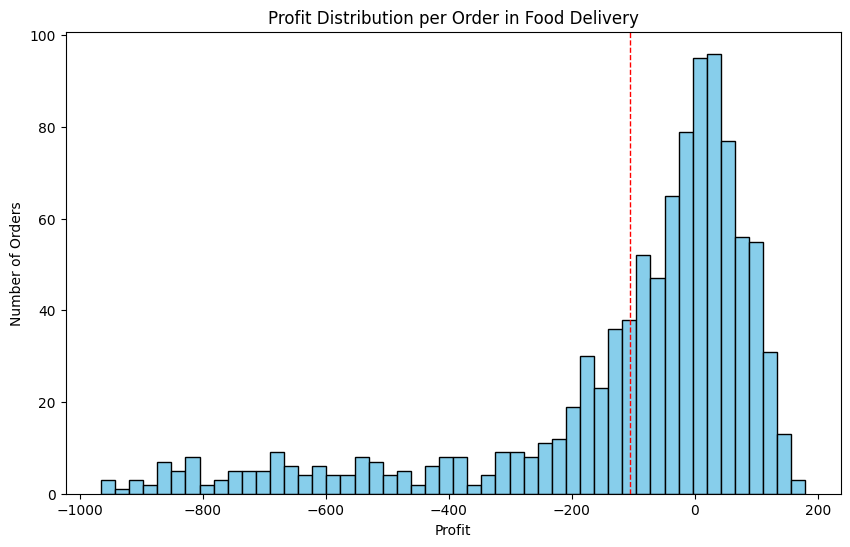

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.hist(df_food['Profit'], bins=50, color='skyblue', edgecolor='black')
plt.title('Profit Distribution per Order in Food Delivery')
plt.xlabel('Profit')
plt.ylabel('Number of Orders')
plt.axvline(df_food['Profit'].mean(), color='red', linestyle='dashed', linewidth=1)
plt.show()

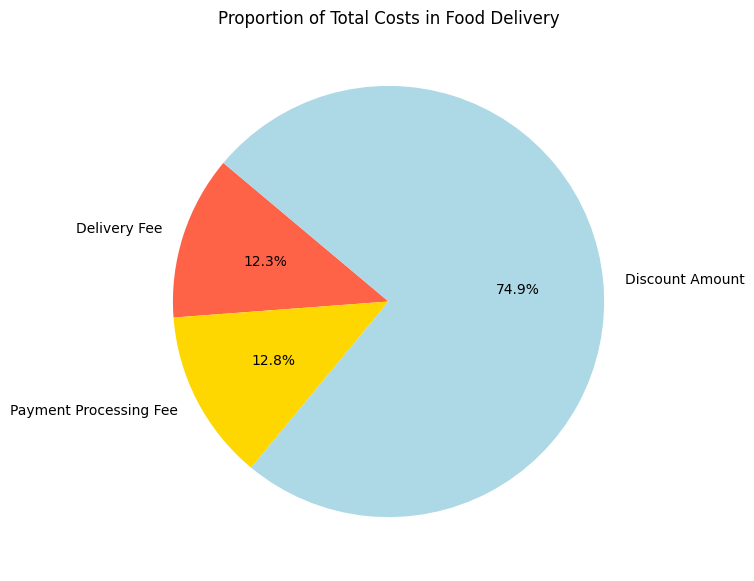

In [ ]:
# pie chart for the proportion of total costs
costs_breakdown = df_food[['Delivery Fee', 'Payment Processing Fee', 'Discount Amount']].sum()
plt.figure(figsize=(7, 7))
plt.pie(costs_breakdown, labels=costs_breakdown.index, autopct='%1.1f%%', startangle=140, colors=['tomato', 'gold', 'lightblue'])
plt.title('Proportion of Total Costs in Food Delivery')
plt.show()

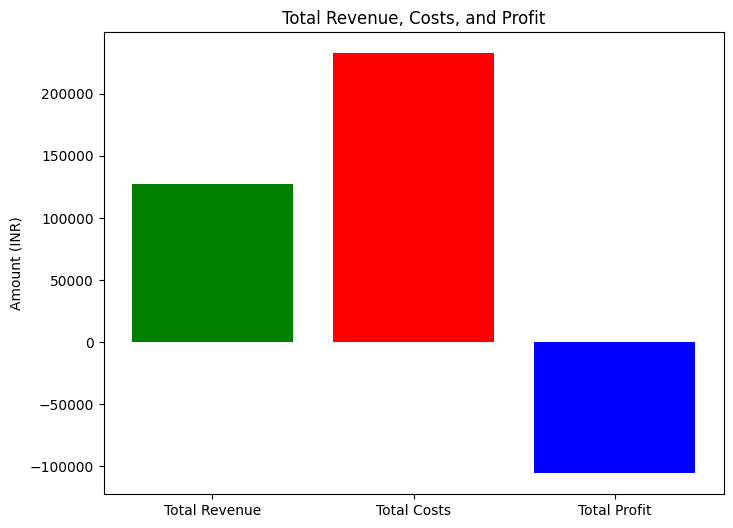

In [ ]:
# bar chart for total revenue, costs, and profit
totals = ['Total Revenue', 'Total Costs', 'Total Profit']
values = [total_revenue, total_costs, total_profit]

plt.figure(figsize=(8, 6))
plt.bar(totals, values, color=['green', 'red', 'blue'])
plt.title('Total Revenue, Costs, and Profit')
plt.ylabel('Amount (INR)')
plt.show()

To find a sweet spot for commission and discount percentages, we can analyze the characteristics of profitable orders more deeply. Specifically, we need to look for:

A new average commission percentage based on profitable orders.
A new average discount percentage for profitable orders, that could serve as a guideline for what level of discount still allows for profitability.

In [ ]:
# filter the dataset for profitable orders
profitable_orders = df_food[df_food['Profit'] > 0]

# calculate the average commission percentage for profitable orders
profitable_orders['Commission Percentage'] = (profitable_orders['Commission Fee'] / profitable_orders['Order Value']) * 100

# calculate the average discount percentage for profitable orders
profitable_orders['Effective Discount Percentage'] = (profitable_orders['Discount Amount'] / profitable_orders['Order Value']) * 100

# calculate the new averages
new_avg_commission_percentage = profitable_orders['Commission Percentage'].mean()
new_avg_discount_percentage = profitable_orders['Effective Discount Percentage'].mean()

new_avg_commission_percentage, new_avg_discount_percentage

<ipython-input-34-12ca9caceaa0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profitable_orders['Commission Percentage'] = (profitable_orders['Commission Fee'] / profitable_orders['Order Value']) * 100
<ipython-input-34-12ca9caceaa0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profitable_orders['Effective Discount Percentage'] = (profitable_orders['Discount Amount'] / profitable_orders['Order Value']) * 100


(30.508436145149435, 5.867469879518072)

Based on this analysis, a strategy that aims for a commission rate closer to 30% and a discount rate around 6% could potentially improve profitability across the board.

In [ ]:
# simulate profitability with recommended discounts and commissions
recommended_commission_percentage = 30.0  # 30%
recommended_discount_percentage = 6.0    # 6%

In [ ]:
# calculate the simulated commission fee and discount amount using recommended percentages
df_food['Simulated Commission Fee'] = df_food['Order Value'] * (recommended_commission_percentage / 100)
df_food['Simulated Discount Amount'] = df_food['Order Value'] * (recommended_discount_percentage / 100)

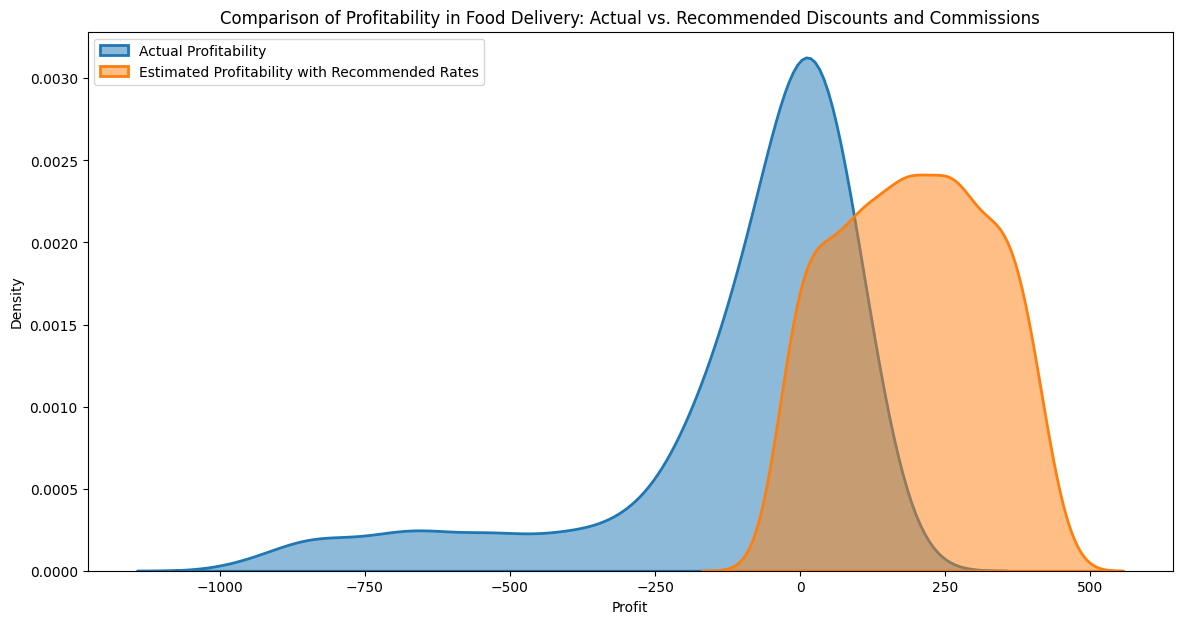

In [ ]:
# recalculate total costs and profit with simulated values
df_food['Simulated Total Costs'] = (df_food['Delivery Fee'] +
                                        df_food['Payment Processing Fee'] +
                                        df_food['Simulated Discount Amount'])

df_food['Simulated Profit'] = (df_food['Simulated Commission Fee'] -
                                   df_food['Simulated Total Costs'])

# visualizing the comparison
import seaborn as sns

plt.figure(figsize=(14, 7))

# actual profitability
sns.kdeplot(df_food['Profit'], label='Actual Profitability', fill=True, alpha=0.5, linewidth=2)

# simulated profitability
sns.kdeplot(df_food['Simulated Profit'], label='Estimated Profitability with Recommended Rates', fill=True, alpha=0.5, linewidth=2)

plt.title('Comparison of Profitability in Food Delivery: Actual vs. Recommended Discounts and Commissions')
plt.xlabel('Profit')
plt.ylabel('Density')
plt.legend(loc='upper left')
plt.show()

The actual profitability distribution shows a mix, with a significant portion of orders resulting in losses (profit < 0) and a broad spread of profit levels for orders. The simulated scenario suggests a shift towards higher profitability per order. The distribution is more skewed towards positive profit, indicating that the recommended adjustments could lead to a higher proportion of profitable orders.
